## Using NLTK tokenizer and POS tagger

In [1]:
import nltk
from nltk import *
import pandas as pd
import numpy as np
import os

In [2]:
nltk.help.upenn_tagset('.*')

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [2]:
data = pd.read_csv('../data/bank_of_england_news.csv', index_col=0)

In [3]:
data.head(2)

,content,header,url
0,Monetary Policy Summary and minutes of the Mon...,Monetary Policy Committee voted unanimously to...,https://www.bankofengland.co.uk/monetary-polic...
1,Monetary Policy Summary and minutes of the Mon...,Bank Rate maintained at 0.5% - June 2018,https://www.bankofengland.co.uk/monetary-polic...


In [4]:
content = data.content[0]
header = data.header[0]

In [15]:
header_tokens = word_tokenize(header)

In [16]:
header_pos_tags = pos_tag(header_tokens); header_pos_tags

[('Monetary', 'JJ'),
 ('Policy', 'NNP'),
 ('Committee', 'NNP'),
 ('voted', 'VBD'),
 ('unanimously', 'RB'),
 ('to', 'TO'),
 ('raise', 'VB'),
 ('Bank', 'NNP'),
 ('Rate', 'NNP'),
 ('to', 'TO'),
 ('0.75', 'CD'),
 ('%', 'NN')]

In [8]:
content;

In [10]:
content_sentences = nltk.tokenize.sent_tokenize(content)

In [11]:
content_tokens = [nltk.tokenize.word_tokenize(sentence) for sentence in content_sentences]

In [13]:
content_pos_tags = pos_tag_sents(content_tokens)

## Generate Dependency Graph using spacy pretrained english model

In [3]:
from spacy import displacy
import spacy
from nltk.tree import Tree
import nltk

/home/anz2/anaconda3/envs/nlp/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/anz2/anaconda3/envs/nlp/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  return f(*args, **kwds)
/home/anz2/anaconda3/envs/nlp/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/anz2/anaconda3/envs/nlp/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  return f(*args, **kwds)


### nltk tree sample

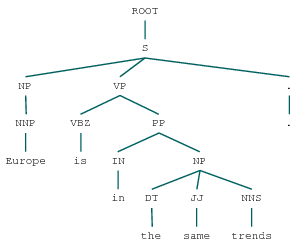

In [4]:
s = '(ROOT (S (NP (NNP Europe)) (VP (VBZ is) (PP (IN in) (NP (DT the) (JJ same) (NNS trends)))) (. .)))'
tree = nltk.tree.Tree.fromstring(s)
def traverse_tree(tree):
    print("tree:", tree)
    for subtree in tree:
        if type(subtree) == nltk.tree.Tree:
            traverse_tree(subtree)

parented_tree = ParentedTree.convert(tree)
parented_tree

In [193]:
def get_head(sample):    
    for sent in sample.sents:
        for token in sent:
            head_word = 'null'
            print(f'token:{token} pos:{token.pos_} dep:{token.dep_}')
            if token.dep_ == 'nsubj' and (token.pos_ == 'NOUN' or token.pos_ == 'PROPN'):
                head_word = token.text
            elif token.dep_ == 'attr' and (token.pos_ == 'NOUN' or token.pos_ == 'PROPN'):
                head_word = token.text
        print(f'sentence:{sent} head:{head_word}')

## spacy examples

In [5]:
def to_nltk_tree(node):
    if node.n_lefts + node.n_rights > 0:
        return Tree(node.orth_, [to_nltk_tree(child) for child in node.children])
    else:
        return node.orth_

In [620]:
sample1 = 'The MPC voted unanimously to increase Bank Rate by 0.25 percentage points, to 0.75%. The committee voted unanimously to maintain the stock of sterling non-financial investment-grade corporate bond purchases, financed by the issuance of central bank reserves, at stg 10 billion. The committee also voted unanimously to maintain the stock of UK goverment bond purchases, financed by the issuance of central bank reserves, at stg 435 billion.'

In [614]:
sample2 = 'Voted to raise the bank rate because of 2.5% unemployment'

In [807]:
doc = en_nlp(sample1)

In [809]:
displacy.serve(doc, style='dep')


    Serving on port 5000...
    Using the 'dep' visualizer



127.0.0.1 - - [04/Sep/2018 21:21:09] "GET / HTTP/1.1" 200 51627
127.0.0.1 - - [04/Sep/2018 21:21:09] "GET /favicon.ico HTTP/1.1" 200 51627



    Shutting down server on port 5000.



In [604]:
sample1

'The MPC voted unanimously to increase bank rate by 0.25 percentage points, to 0.75%. The committee voted unanimously to maintain the stock of sterling non-financial investment-grade corporate bond purchases, financed by the issuance of central bank reserves, at stg 10 billion. The committee also voted unanimously to maintain the stock of UK goverment bond purchases, financed by the issuance of central bank reserves, at stg 435 billion.'

In [312]:
sample1 = 'The MPC voted unanimously to increase bank rate by 0.25 percentage points, to 0.75%. The committee voted unanimously to maintain the stock of sterling non-financial investment-grade corporate bond purchases, financed by the issuance of central bank reserves, at stg 10 billion. The committee also voted unanimously to maintain the stock of UK goverment bond purchases, financed by the issuance of central bank reserves, at stg 435 billion.'

In [628]:
sentence = 'The MPC voted unanimously to increase Bank Rate by 0.25 percentage points, to 0.75%.'

In [629]:
doc = nlp(sample1)
for token in doc:
    if token.pos_ in 'NUM' or True:
        print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
          token.shape_, token.is_alpha, token.is_stop)

The the DET DT det Xxx True False
MPC mpc PROPN NNP nsubj XXX True False
voted vote VERB VBD ROOT xxxx True False
unanimously unanimously ADV RB advmod xxxx True False
to to PART TO aux xx True True
increase increase VERB VB xcomp xxxx True False
Bank bank PROPN NNP compound Xxxx True False
Rate rate PROPN NNP dobj Xxxx True False
by by ADP IN prep xx True True
0.25 0.25 NUM CD nummod d.dd False False
percentage percentage NOUN NN compound xxxx True False
points point NOUN NNS pobj xxxx True False
, , PUNCT , punct , False False
to to ADP IN prep xx True True
0.75 0.75 NUM CD nummod d.dd False False
% % NOUN NN pobj % False False
. . PUNCT . punct . False False
The the DET DT det Xxx True False
committee committee NOUN NN nsubj xxxx True False
voted vote VERB VBD ROOT xxxx True False
unanimously unanimously ADV RB advmod xxxx True False
to to PART TO aux xx True True
maintain maintain VERB VB xcomp xxxx True False
the the DET DT det xxx True True
stock stock NOUN NN dobj xxxx True Fals

In [630]:
for chunk in doc.noun_chunks:
    print(chunk)

The MPC
Bank Rate
0.25 percentage points
0.75%
The committee
the stock
sterling non-financial investment-grade corporate bond purchases
the issuance
central bank reserves
stg
The committee
the stock
UK goverment bond purchases
the issuance
central bank reserves
stg


In [631]:
doc.ents

(MPC, Bank Rate, 0.25, 0.75%, stg 10 billion, UK, stg 435 billion)

## Extraction of Bank Rate number from given samples

In [664]:
keywords = ['bank rate']
good_preps = ['to','at']
nlp = spacy.load('en')

In [736]:
def get_sentence_trees(sentence, nlp):
    doc = nlp(sentence)
    trees = [to_nltk_tree(x.root) for x in doc.sents]
    return trees

In [737]:
def all_found(text, keys):
    for key in keys:
        if key.lower() not in text.lower():
            return False
    return True

In [740]:
# ???? not completed ?????
def filter_sents(sample):
    target_num = 'null'
    for sent in sample.sents:
        last_verb = None
        for token in  sent:
            if token.pos_ == 'VB':
                last_verb = token
            if token.dep_ == 'prep':
                if token in ['to', 'at', 'of']:
                    print(token)

In [841]:
def get_bank_rate(input_text, keywords, good_preps, nlp):
    # get all sentences which contain keywords
    doc = nlp(input_text)
    good_sentences = []
    for sentence in doc.sents:
        if all_found(str(sentence), keywords):
            good_sentences.append(str(sentence))
   
    # search for correct bank rate percentage if available   
    result = []
    for sentence in good_sentences:
        sent_doc = nlp(sentence)
        percentages = find_dependencies(sent_doc,verbs, preps)
        result.append(percentages)
    return result

In [742]:
data = pd.read_csv('../data/samples.csv', index_col=0)

In [751]:
texts = data.text.values.tolist()
labels = data.label.values.tolist()

In [842]:
for idx, sample in enumerate(samples):
    print('-'*100)
    print(sample)
    print('-'*100)
    print('%'*100)
    result = get_bank_rate(sample, keywords, good_preps, nlp)
    print(f'label:{labels[idx]} predicted:{result}')
    print('%'*100)

----------------------------------------------------------------------------------------------------
The Governor invited the Committee to vote on the propositions that: Bank Rate should be maintained at 0.5%; The Bank of England should maintain the stock of purchased assets financed by the issuance of central bank reserves at £375 billion. Regarding Bank Rate, the Committee voted unanimously in favour of the proposition. Regarding the stock of purchased assets, the Committee voted unanimously in favour of the proposition. Minutes of the meeting
----------------------------------------------------------------------------------------------------
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
sentence validated with parameters:
Bank Rate maintained at 0.5 %
label:0.5% predicted:[['0.5%'], []]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
-------------------------------------------

sentence validated with parameters:
Bank Rate maintained at 0.5 %
label:0.5% predicted:[['0.5%']]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
----------------------------------------------------------------------------------------------------
The Governor invited the Committee to vote on the proposition that Bank Rate should be maintained at 0.5%. The Committee voted unanimously in favour of the proposition. The Governor invited the Committee to vote on the proposition that it should continue with the programme, as agreed at the March meeting and announced on 5 March, of asset purchases totalling £75 billion financed by issuance of central bank reserves. The Committee voted unanimously in favour of the proposition. Minutes of the meeting
----------------------------------------------------------------------------------------------------
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

sentence validated with parameters:
Bank Rate maintained at 0.5 %
label:0.5% predicted:[['0.5%'], [], [], []]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
----------------------------------------------------------------------------------------------------
The Governor invited members to vote on the proposition that the Bank’s repo rate should be maintained at 5.25%. Eight members of the Committee (the Governor, Mervyn King, David Clementi, Christopher Allsopp, Kate Barker, Charles Bean, Stephen Nickell and Ian Plenderleith) voted for the proposition. Sushil Wadhwani voted against, preferring a reduction in the repo rate of 25 basis points. Minutes of the meeting
----------------------------------------------------------------------------------------------------
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
label:nan predicted:[]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

## Dependency Trees exploration for better results

In [836]:
br1 = 'Bank Rate should be maintained at 0.5%'
br2 = 'Bank Rate should be reduced by 1.0 percentage points to 2.0%.'
br3 = 'At its meeting ending on 1 August 2018, the MPC voted unanimously to increase Bank Rate by 0.25 percentage points, to 0.75%.'
br4 = 'At its meeting ending on 1 August 2018, the MPC voted unanimously to increase Bank Rate by 0.25 percentage points to 0.75%,because of 2.6% unemployment.'

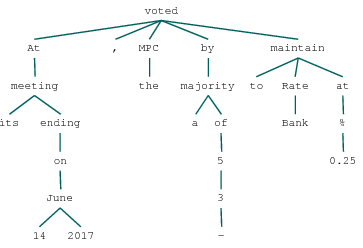

In [964]:
 get_sentence_trees('At its meeting ending on 14 June 2017, the MPC voted by a majority of 5-3 to maintain Bank Rate at 0.25%', nlp)[0]

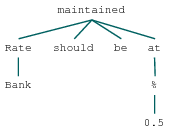

In [752]:
get_sentence_trees(br1, nlp)[0]

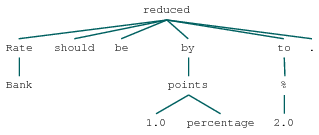

In [755]:
get_sentence_trees(br2, nlp)[0]

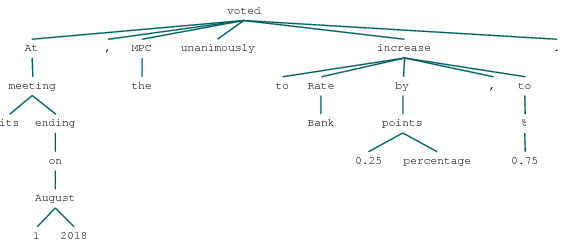

In [756]:
get_sentence_trees(br3, nlp)[0]

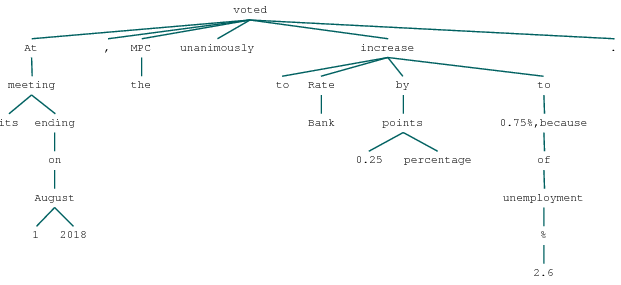

In [837]:
get_sentence_trees(br4, nlp)[0]

### some hints:
wee see **'Bank Rate'** chunks is connected to **'to 0.75%'** chunk with VERB **'increase'** 

because of that, some connections can be caught

In [793]:
t = get_sentence_trees(br1,nlp)[0]

In [798]:
pt = nltk.tree.ParentedTree.convert(t)

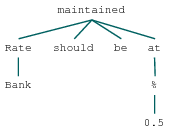

In [800]:
pt

In [806]:
print(pt)

(maintained (Rate Bank) should be (at (% 0.5)))


In [825]:
def find_dependencies(sample, verbs, preps):
    lca = sample.get_lca_matrix()
#     print(lca)
#     print([(x, y) for x, y in enumerate(sample[:])])
    percs_id = []
    banks_id = []
    rates_id = []
    preps_id = []
    verbs_id = []

    nums_id = []

    for idx, token in enumerate(sample[:]):
        if token.text == '%':
            percs_id.append(idx)
        elif token.text.lower() == 'rate':
            rates_id.append(idx)
        elif token.text.lower() == 'bank':
            banks_id.append(idx)
        elif token.text in verbs and token.pos_ == 'VERB':
            verbs_id.append(idx)
        elif token.text in preps and token.pos_ == 'ADP':
            preps_id.append(idx)
        elif token.pos_ == 'NUM':
            nums_id.append(idx)

    result = []
    for num_id in nums_id:
        num = sample[num_id]

        for perc_id in percs_id:
            perc = sample[perc_id]
            if lca[perc_id, num_id] in [perc_id, num_id]:

                for prep_id in preps_id:
                    prep = sample[prep_id]
                    if lca[prep_id, perc_id] == prep_id:

                        for bank_id in banks_id:
                            bank = sample[bank_id]

                            for rate_id in rates_id:
                                rate = sample[rate_id]
                                if lca[bank_id, rate_id] in [bank_id, rate_id]:

                                    for verb_id in verbs_id:
                                        verb = sample[verb_id]
                                        if lca[prep_id, bank_id] == verb_id:
                                            print('sentence validated with parameters:')
                                            print(bank, rate, verb, prep, num, perc)
                                            result.append(str(num) + str(perc))
    return result

In [822]:
verbs = ['maintained', 'increase','reduced']
preps = ['to','at']

## Extraction of Quantitative Easing (QE) number from given samples

### Dependency Trees exploration to extract main characters in sentences and extract important dependencies and connections

In [1105]:
i = -1

The Bank of England should maintain the stock of purchased assets financed by the issuance of central bank reserves at £375 billion.
[The Bank, England, the stock, purchased assets, the issuance, central bank reserves]
[('The', 'DET'), ('Bank', 'PROPN'), ('of', 'ADP'), ('England', 'PROPN'), ('should', 'VERB'), ('maintain', 'VERB'), ('the', 'DET'), ('stock', 'NOUN'), ('of', 'ADP'), ('purchased', 'VERB'), ('assets', 'NOUN'), ('financed', 'VERB'), ('by', 'ADP'), ('the', 'DET'), ('issuance', 'NOUN'), ('of', 'ADP'), ('central', 'ADJ'), ('bank', 'NOUN'), ('reserves', 'NOUN'), ('at', 'ADP'), ('£', 'SYM'), ('375', 'NUM'), ('billion', 'NUM'), ('.', 'PUNCT')]


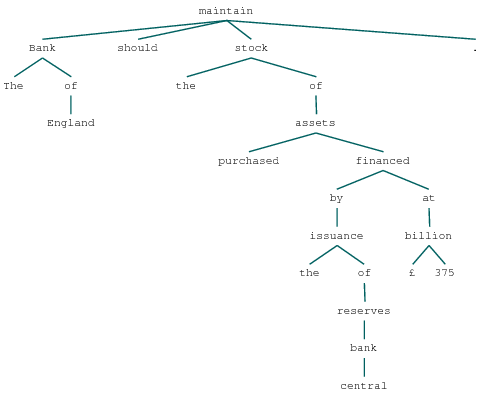

In [1106]:
i+=1;
print(qe_sents[i])
print([(x) for x in nlp(qe_sents[i]).noun_chunks])
print([(x.text, x.pos_) for x in nlp(qe_sents[i])[:]])
get_sentence_trees(' '.join(qe_sents), nlp)[i]

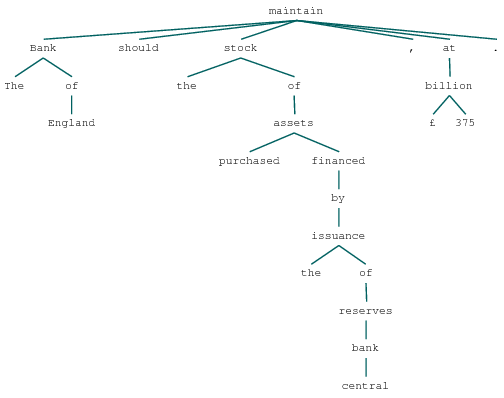

In [1057]:
get_sentence_trees('The Bank of England should maintain the stock of purchased assets financed by the issuance of central bank reserves, at £375 billion.',nlp)[0]

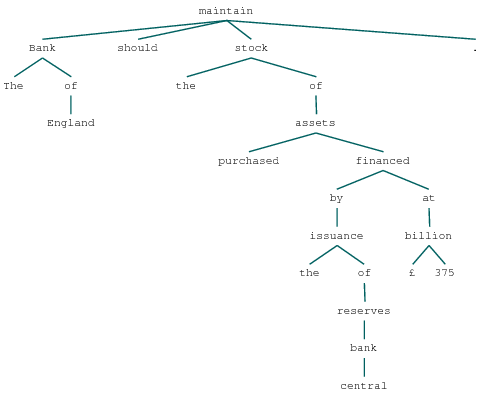

In [1082]:
get_sentence_trees(' '.join(qe_sents), nlp)[0]

In [1099]:
('the bank of england') + (VERB:maintain) + ('stock')
('stock') + ('of purchased assets')
('purchased assets') + (VERB:financed) + (prep:by) + ('issuance of central bank reserves')
('issuance of central bank reserves') + financed + (preps:at) + (money)

# The bank of England - maintain - stock
# stock - of -purchased assets
# purchased assets - financed -  by issuance of  central bank reserves
# issuance of central bank reserves - financed - at - Money

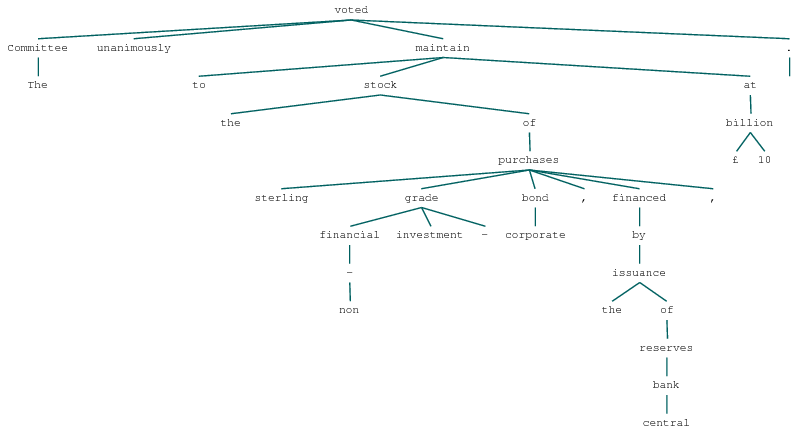

In [1085]:
get_sentence_trees(' '.join(qe_sents), nlp)[3]

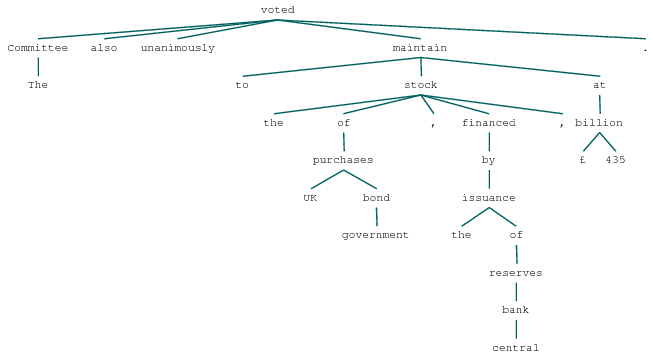

In [1093]:
get_sentence_trees(' '.join(qe_sents), nlp)[10]

In [1101]:
('Comittee') + (VERB:voted) + (VERB:maintain) + ('stock')
('stock') + ('of purchases') + (VERB:financed) + ('by issuance of the central bank reserve')
('stock') + (VERB:maintain) + (prep:at) + (Money)

# committee voted to maintain stock
# stock of bond purchases of UK government was financed by issuance of central bank reserve
# maintain stock at some Money

keywords:[stock, maintain, voted, at] 

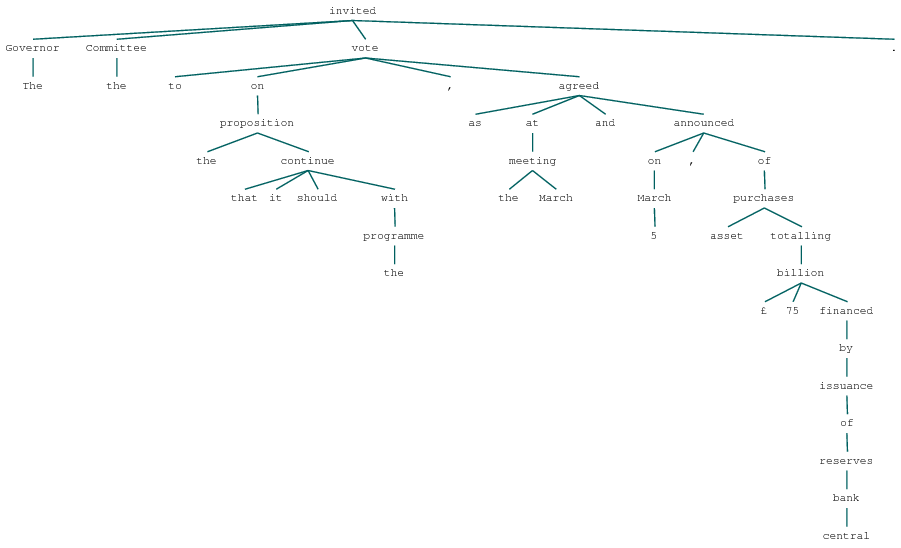

In [1090]:
get_sentence_trees(' '.join(qe_sents), nlp)[8]

In [1102]:
qe_sents[8]

'The Governor invited the Committee to vote on the proposition that it should continue with the programme, as agreed at the March meeting and announced on 5 March, of asset purchases totalling £75 billion financed by issuance of central bank reserves.'

In [ ]:
('Comittee') + (VERB:voted) + (VERB:maintain) + ('stock')
('stock') + ('of purchases') + (VERB:financed) + ('by issuance of the central bank reserve')
('stock') + (VERB:maintain) + (prep:at) + (Money)

# committee voted to maintain stock
# stock of bond purchases of UK government was financed by issuance of central bank reserve
# maintain stock at some Money

keywords:[stock, maintain, voted, at] 

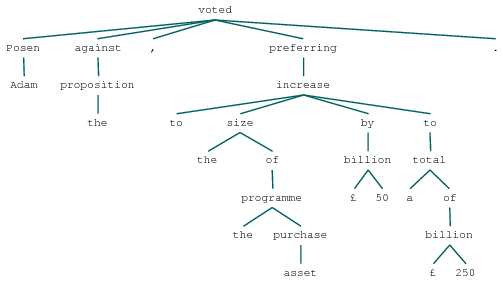

In [1086]:
get_sentence_trees(' '.join(qe_sents), nlp)[4]

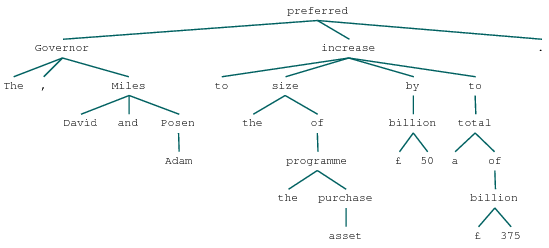

In [1087]:
get_sentence_trees(' '.join(qe_sents), nlp)[5]

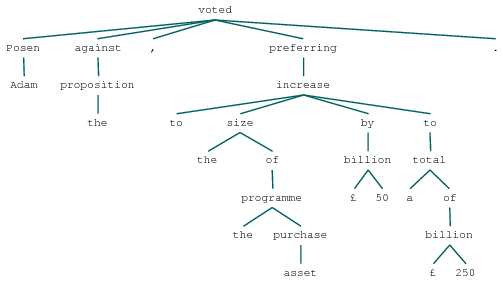

In [1088]:
get_sentence_trees(' '.join(qe_sents), nlp)[6]

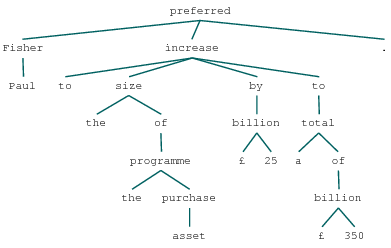

In [1089]:
get_sentence_trees(' '.join(qe_sents), nlp)[7]

In [1016]:
displacy.serve(nlp(qe_sents[i]), style='ent')


    Serving on port 5000...
    Using the 'ent' visualizer



127.0.0.1 - - [05/Sep/2018 16:36:06] "GET / HTTP/1.1" 200 1719
127.0.0.1 - - [05/Sep/2018 16:36:07] "GET /favicon.ico HTTP/1.1" 200 1719



    Shutting down server on port 5000.



### We have two variants:
- **The committee votes to maintain stock at some Number financed by central bank**  
    ('Comittee') + (VERB:voted) + (VERB:maintain) + ('stock')   
    ('stock') + ('of purchases') + (VERB:financed) + ('by issuance of the central bank reserve')    
    ('stock') + (VERB:maintain) + (prep:at) + (Money)  

    **sample connections inside the sentence:**
        - committee voted to maintain stock
        - stock of bond purchases of UK government was financed by issuance of central bank reserve
        - maintain stock at some Money
        
    **keywords**:[stock, maintain, voted, at, committee] 
    

- **Bank og England does maintaing stock at some Number financed by central bank**  
    ('the bank of england') + (VERB:maintain) + ('stock')  
    ('stock') + ('of purchased assets')  
    ('purchased assets') + (VERB:financed) + (prep:by) + ('issuance of central bank reserves')  
    ('issuance of central bank reserves') + financed + (preps:at) + (money)  

    **sample connections inside the sentence:**
        - The bank of England - maintain - stock
        - stock - of -purchased assets
        - purchased assets - financed -  by issuance of  central bank reserves
        - issuance of central bank reserves - financed - at - Money
        
    **keywords**:[stock, maintain, at, bank of england ] 

In [911]:
def get_sentence_trees(sentence, nlp):
    doc = nlp(sentence)
    trees = [to_nltk_tree(x.root) for x in doc.sents]
    return trees

In [1158]:
def all_found(text, keys):
    for key in keys:
        if key.lower() not in text.lower():
            return False
    return True

In [1167]:
def get_qe(input_text,nlp, keywords, preps, subjects, subjs, verbs,obj):
    # get all sentences which contain keywords
    doc = nlp(input_text)
    result = []
    for sentence in doc.sents:
        if all_found(str(sentence), keywords+preps+subjects[0:1]):
            # search for correct QE number if available   
            sent_doc = nlp(str(sentence))
            qe_number = find_qe(sent_doc,subjs[0],obj, verbs, preps)
            result.append(qe_number)
            continue
            
        elif all_found(str(sentence), keywords+preps+subjects[1:2]):
            # search for correctQE number if available   
            sent_doc = nlp(str(sentence))
            qe_number = find_qe(sent_doc,subjs[1],obj, verbs, preps)
            result.append(qe_number)
            continue
            
    return result

In [1172]:
def find_qe(sample, subject, obj, verbs, preps):
    lca = sample.get_lca_matrix()
    currencies_id = []
    nums_id = []
    subjs_id = []
    preps_id = []
    verbs_id = []
    objs_id = []

#     print(lca)
#     print([(x, y) for x, y in enumerate(sample[:])])

    # save indices of specific control tokens
    for idx, token in enumerate(sample[:]):
        if token.text in '$£':
            currencies_id.append(idx)
        elif token.text.lower() == subject:
            subjs_id.append(idx)
        elif token.text in verbs and token.pos_ == 'VERB':
            verbs_id.append(idx)
        elif token.text in preps and token.pos_ == 'ADP':
            preps_id.append(idx)
        elif token.pos_ == 'NUM' and token.text.isdigit():
            nums_id.append(idx)
        elif token.text.lower() == obj:
            objs_id.append(idx)

    result = []

    # we have two cases:
    # 1) committee voted .........
    # 2) bank of england maintained ....

    # case: 1
    if subject == 'england':
        for subj_id in subjs_id:
            subj = sample[subj_id]

            for verb_id in verbs_id:
                verb = sample[verb_id]
                if lca[subj_id, verb_id] == verb_id and verb.text.lower() == 'maintain':

                    for num_id in nums_id:
                        num = sample[num_id]

                        for currency_id in currencies_id:
                            currency = sample[currency_id]

                            for prep_id in preps_id:
                                prep = sample[prep_id]
                                if lca[prep_id, lca[num_id, prep_id]] == verb_id \
                                        and lca[lca[currency_id, num_id], prep_id] == prep_id:

                                    for obj_id in objs_id:
                                        obj = sample[obj_id]
                                        if lca[obj_id, verb_id] == verb_id:
                                            if lca[prep_id, verb_id] == verb_id:
                                                print('sentence validated with parameters:')
                                                print(subj, verb, obj, prep, currency, num)
                                                context = ' '.join([str(subj), str(verb), str(obj), str(prep),
                                                                    str(currency), str(num)])
                                                qe_number = str(currency) + str(num)
                                                result.append((context, qe_number))

    # case: 2
    if subject == 'committee':
        for subj_id in subjs_id:
            subj = sample[subj_id]

            for verb_id in verbs_id:
                verb = sample[verb_id]
                if verb.text.lower() == 'voted' and lca[subj_id, verb_id] == verb_id:

                    for verb_2_id in verbs_id:
                        verb_2 = sample[verb_2_id]
                        if verb.text.lower() == 'maintain' and lca[verb_id, verb_2_id] == verb_id:

                            for num_id in nums_id:
                                num = sample[num_id]

                                for currency_id in currencies_id:
                                    currency = sample[currency_id]

                                    for prep_id in preps_id:
                                        prep = sample[prep_id]
                                        if lca[prep_id, lca[num_id, prep_id]] == verb_id \
                                                and lca[lca[currency_id, num_id], prep_id] == prep_id:

                                            for obj_id in objs_id:
                                                obj = sample[obj_id]
                                                if lca[obj_id, verb_2_id] == verb_2_id:
                                                    if lca[prep_id, verb_id] == verb_id:
                                                        print('sentence validated with parameters:')
                                                        print(subj, verb, obj, prep, currency, num)
                                                        context = ' '.join([str(subj), str(verb), str(verb_2),
                                                                            str(obj), str(prep), str(currency),
                                                                            str(num)])
                                                        qe_number = str(currency) + str(num)
                                                        result.append((context, qe_number))

    return result


In [1148]:
verbs = ['maintain', 'voted']
preps = ['at']
subjects = ['the bank of england', 'the committee']
subjs = ['england', 'the committee']
keywords = ['maintain']
obj = 'stock'

In [1129]:
nlp = spacy.load('en')

In [1130]:
data = pd.read_csv('../data/qe_sent_samples.csv', index_col=0)

In [1132]:
texts = data.text.values.tolist()
labels = data.label.values.tolist()

In [1173]:
for idx, text in enumerate(texts):
    print('-'*100)
    print(text)
    print('-'*100)
    print('%'*100)
    result = get_qe(text,nlp, keywords, preps,subjects,subjs,verbs,obj)
    print(f'label:{labels[idx]} predicted:{result}')
    print('%'*100)

----------------------------------------------------------------------------------------------------
The Bank of England should maintain the stock of purchased assets financed by the issuance of central bank reserves at £375 billion.
----------------------------------------------------------------------------------------------------
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
sentence validated with parameters:
England maintain stock at £ 375
label:£375 predicted:[[('England maintain stock at £ 375', '£375')]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
----------------------------------------------------------------------------------------------------
The Bank of England should maintain the stock of asset purchases financed by the issuance of central bank reserves at £375 billion.
---------------------------------------------------------------------------------------------

In [1]:
import sys
sys.path.append('/home/anz2/PycharmProjects/bank-news-analysis/')

from model.tree import TreeWrapper
import spacy
import pandas as pd

/home/anz2/anaconda3/envs/nlp/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/anz2/anaconda3/envs/nlp/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  return f(*args, **kwds)
/home/anz2/anaconda3/envs/nlp/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/anz2/anaconda3/envs/nlp/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  return f(*args, **kwds)


In [51]:
data = pd.read_csv('../data/samples.csv', index_col=0)
texts = data.text.values.tolist()
# texts = [x.replace(';', '.') for x in texts]

text = texts[0]

In [52]:
text

'The Governor invited the Committee to vote on the propositions that: Bank Rate should be maintained at 0.5%; The Bank of England should maintain the stock of purchased assets financed by the issuance of central bank reserves at £375 billion. Regarding Bank Rate, the Committee voted unanimously in favour of the proposition. Regarding the stock of purchased assets, the Committee voted unanimously in favour of the proposition. Minutes of the meeting'

In [53]:
nlp = spacy.load('en')
doc = nlp(text)
span = [x for x in doc.sents][0]

In [54]:
span

The Governor invited the Committee to vote on the propositions that: Bank Rate should be maintained at 0.5%; The Bank of England should maintain the stock of purchased assets financed by the issuance of central bank reserves at £375 billion.

In [55]:
tree = TreeWrapper.from_spacy_tree(span.root)
tree.lca_from_spacy(span)

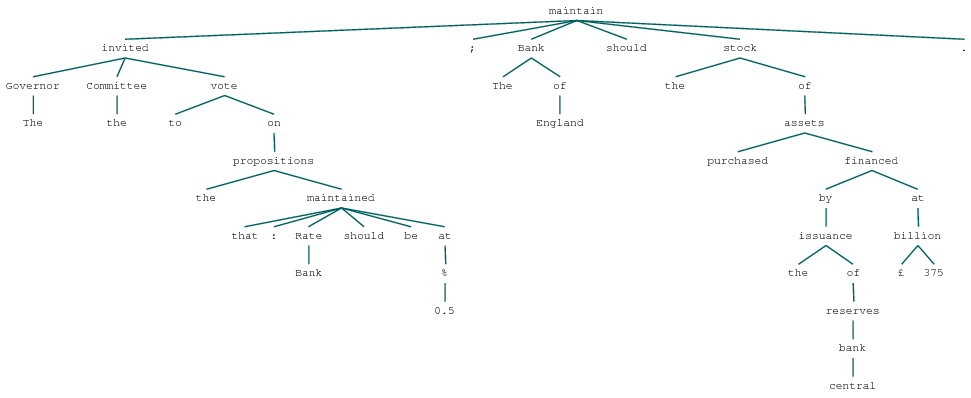

In [56]:
tree

In [8]:
%timeit [x for x in tree.subtrees()]

22.4 µs ± 1.54 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [9]:
%timeit tree.subtree_tokens()

13.9 µs ± 242 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [11]:
%timeit tree[2][0]

1.45 µs ± 50 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [39]:
tree[2][1][0][1][5][0]

In [41]:
% timeit tree[2][1][0][1][5][0].is_ancestor(tree)

16.3 µs ± 128 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [46]:
%timeit TreeWrapper.lca(tree,tree[2])

3.8 µs ± 62.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## Clustering data contents using Kmeans and Plotting with PCA + Matplotlib.Pyplot

In [54]:
from sklearn.cluster import KMeans

In [53]:
contents = list(data.content.values)

In [67]:
content_vectors = np.array([en_nlp(x).vector for x in contents])

In [103]:
scores = []

In [104]:
for clusters in range(3,10):
    kmeans = KMeans(clusters)
    kmeans.fit(content_vectors)
    scores.append(kmeans.inertia_)

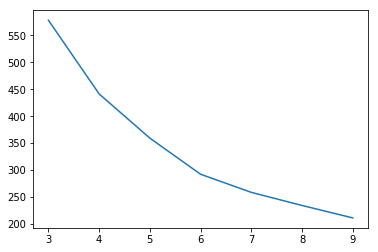

In [105]:
plt.plot(range(3,10),scores)

In [136]:
n_clusters = 4

In [137]:
model = KMeans(n_clusters)
model.fit(content_vectors)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [138]:
labels = model.labels_.tolist()

In [139]:
content_classes = {key:[] for key in set(labels)}

In [140]:
for idx in range(len(labels)):
    content_classes[labels[idx]].append(contents[idx])

In [141]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [142]:
pca = PCA(n_components=2)
pca.fit(content_vectors.transpose())

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [143]:
pca.components_.shape

(2, 232)

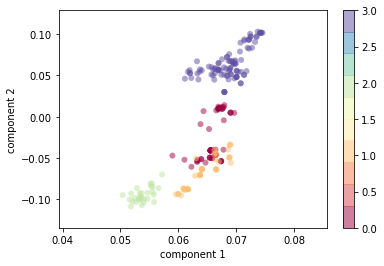

In [144]:
plt.scatter(pca.components_[0,:], pca.components_[1,:],
            c=labels, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

## Collect one sample from each cluster

In [601]:
i=-1
class_id = 3

In [343]:
samples_to_consider = {key:[] for key in content_classes.keys()}

In [570]:
samples_to_consider[class_id].append(i)

In [602]:
i+=1; content_classes[class_id][i]

'The Governor invited the Committee to vote on the propositions that: Bank Rate should be maintained at 0.5%; The Bank of England should maintain the stock of purchased assets financed by the issuance of central bank reserves at £375 billion. Regarding Bank Rate, seven members of the Committee (the Governor, Ben Broadbent, Jon Cunliffe, Nemat Shafik, Kristin Forbes, Andrew Haldane and David Miles) voted in favour of the proposition. Ian McCafferty and Martin Weale voted against the proposition, preferring to increase Bank Rate by 25 basis points. Regarding the stock of purchased assets, the Committee voted unanimously in favour of the proposition. Minutes of the meeting'

In [596]:
samples_to_consider

{0: [0, 7, 18, 19, 33, 49], 1: [0, 1, 11], 2: [0], 3: [0, 6, 73]}

In [597]:
samples = [content_classes[cl_idx][idx] for cl_idx, idxs in samples_to_consider.items() for idx in idxs]

In [598]:
samples

['The Governor invited the Committee to vote on the propositions that: Bank Rate should be maintained at 0.5%; The Bank of England should maintain the stock of purchased assets financed by the issuance of central bank reserves at £375 billion. Regarding Bank Rate, the Committee voted unanimously in favour of the proposition. Regarding the stock of purchased assets, the Committee voted unanimously in favour of the proposition. Minutes of the meeting',
 'The Governor invited the Committee to vote on the propositions that: Bank Rate should be maintained at 0.5%; The Bank of England should maintain the stock of purchased assets financed by the issuance of central bank reserves at £375 billion. Regarding Bank Rate, seven members of the Committee (the Governor, Ben Broadbent, Jon Cunliffe, Nemat Shafik, Kristin Forbes, Andrew Haldane and David Miles) voted in favour of the proposition. Ian McCafferty and Martin Weale voted against the proposition, preferring to increase Bank Rate by 25 basis

## Using Stanford Dependency Parser

In [163]:
from nltk.parse.stanford import StanfordDependencyParser

In [ ]:
path_to_jar = 'path_to/stanford-parser-full-2014-08-27/stanford-parser.jar'
path_to_models_jar = 'path_to/stanford-parser-full-2014-08-27/stanford-parser-3.4.1-models.jar'

In [ ]:
dependency_parser = StanfordDependencyParser(path_to_jar=path_to_jar, path_to_models_jar=path_to_models_jar)

result = dependency_parser.raw_parse('I shot an elephant in my sleep')
dep = result.next()

list(dep.triples())